## **CALIDAD DE LAS AGUAS DEL RÍO TAJO ENTRE MADRID Y TOLEDO**

**1. INTRODUCCION**

De acuerdo con la DMA, el estado químico, es una expresión del grado de cumplimiento de las normas de calidad ambiental establecidas reglamentariamente para los contaminantes presentes en una masa de agua superficial.

Así, el estado químico es evaluado en base a las Normas de Calidad Ambiental (NCA) aplicables a las concentraciones de sustancias prioritarias en las aguas superficiales, sedimentos y biota, clasificándose como “bueno” o como “no se alcanza el buen estado químico”.

El Real Decreto 60/2011, de 21 de enero, sobre las normas de calidad ambiental en el ámbito de la política de aguas, transpone todos los aspectos contenidos en la Directiva 2008/105/CE; incorpora los requisitos técnicos sobre análisis químicos establecidos en la Directiva 2009/90/CE; aprovecha para adaptar parte de la legislación española que transpone la Directiva 76/464/CEE y directivas derivadas; y actualiza la legislación española que recoge las normas de calidad ambiental de las sustancias preferentes (RD 995/2000, que deroga).

El objetivo del análisis es utilizar logaritmos de regresión con el fin de conocer las relaciones entre las concentraciones de varios indicadores químicos en cuatro estaciones de control del estado químico en el río Tajo: Madrid y Aranjuez. Estas estaciones miden la contaminación del río Tajo en dos puntos críticos por ser los mayores núcleos de población e industria de la cuenca.

Se utilizarán datos de la Confederación Hidrográfica del Tajo de los años 2018 y 2019, obtenidos a partir de su página web (http://www.chtajo.es/LaCuenca/CalidadAgua/Resultados_Informes/Paginas/RISupFisicoQu%C3%ADmico.aspx)

**2. LIBRERIAS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV 
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore', module='sklearn')

**3. ANÁLISIS EXPLORATORIO DE LOS DATOS**



In [2]:
archivo = 'C:/Users/NITROPC/Desktop/DATA SCIENCE/CERTIFICACION MACHINE LEARNING/02 - ML SUPERVISADO - REGRESION/6 - PROYECTO/CEMAS_FQ.xlsx'

In [3]:
data = pd.read_excel(archivo, sheet_name ='Hoja1')

In [4]:
data.head()

,Estación,Código Interno,CCAA,Provincia,Municipio,Cauce,UTMX,UTMY,Fecha de toma,Amonio_mg NH4/l,Cianuros_µg CN/l,DBO5_mg O2/l,DQO (Cr2O7)_mg O2/l,Fluoruros_mg F/l,Fosfatos_mg PO4/l,Nitratos_mg NO3/l,Nitritos_mg NO2/l,Nitrógeno total_mgN/l,Sólidos en suspensión_mg/l,Sulfatos_mg SO4/l
0,ARANJUEZ 1 - TAJO,22,MADRID,Madrid,Aranjuez,RÍO TAJO,452121,4432818,2018-06-06,"<0,10",230,"<2,0",<20,0.34,"<0,10",5.2,"<0,05","<2,0",24,510
1,ARANJUEZ 1 - TAJO,22,MADRID,Madrid,Aranjuez,RÍO TAJO,452121,4432818,2018-03-22,"<0,10",390,"<2,0",<20,0.42,"<0,10",6.1,"<0,05","<2,0",7,670
2,ARANJUEZ 1 - TAJO,22,MADRID,Madrid,Aranjuez,RÍO TAJO,452121,4432818,2018-09-27,"<0,10",190,"<2,0",<20,0.30,"<0,10",8,"<0,05","<2,0",18,560
3,ARANJUEZ 1 - TAJO,22,MADRID,Madrid,Aranjuez,RÍO TAJO,452121,4432818,2018-12-04,"<0,10",240,"<2,0",<20,0.35,"<0,10",7,"<0,05","<2,0","<5,0",550
4,ARANJUEZ 1 - TAJO,22,MADRID,Madrid,Aranjuez,RÍO TAJO,443484,4432071,2018-11-19,6.8,130,"<2,0",29,0.29,0.6,24,1.24,14,41,300


Como podemos observar, existen varias columnas que no aportarán ninguna información útil para nuestro análisis. Vamos a eliminarlas.

In [5]:
data = data.drop(['CCAA', 'Provincia', 'Municipio', 'Cauce', 'UTMX', 'UTMY'], axis = 1)

In [6]:
data.head()

,Estación,Código Interno,Fecha de toma,Amonio_mg NH4/l,Cianuros_µg CN/l,DBO5_mg O2/l,DQO (Cr2O7)_mg O2/l,Fluoruros_mg F/l,Fosfatos_mg PO4/l,Nitratos_mg NO3/l,Nitritos_mg NO2/l,Nitrógeno total_mgN/l,Sólidos en suspensión_mg/l,Sulfatos_mg SO4/l
0,ARANJUEZ 1 - TAJO,22,2018-06-06,"<0,10",230,"<2,0",<20,0.34,"<0,10",5.2,"<0,05","<2,0",24,510
1,ARANJUEZ 1 - TAJO,22,2018-03-22,"<0,10",390,"<2,0",<20,0.42,"<0,10",6.1,"<0,05","<2,0",7,670
2,ARANJUEZ 1 - TAJO,22,2018-09-27,"<0,10",190,"<2,0",<20,0.30,"<0,10",8,"<0,05","<2,0",18,560
3,ARANJUEZ 1 - TAJO,22,2018-12-04,"<0,10",240,"<2,0",<20,0.35,"<0,10",7,"<0,05","<2,0","<5,0",550
4,ARANJUEZ 1 - TAJO,22,2018-11-19,6.8,130,"<2,0",29,0.29,0.6,24,1.24,14,41,300


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Estación                    32 non-null     object        
 1   Código Interno              32 non-null     int64         
 2   Fecha de toma               32 non-null     datetime64[ns]
 3   Amonio_mg NH4/l             32 non-null     object        
 4   Cianuros_µg CN/l            32 non-null     int64         
 5   DBO5_mg O2/l                32 non-null     object        
 6   DQO (Cr2O7)_mg O2/l         32 non-null     object        
 7   Fluoruros_mg F/l            32 non-null     float64       
 8   Fosfatos_mg PO4/l           32 non-null     object        
 9   Nitratos_mg NO3/l           32 non-null     object        
 10  Nitritos_mg NO2/l           32 non-null     object        
 11  Nitrógeno total_mgN/l       32 non-null     object        
 

Varias de las columnas relativas a los contaminantes aparecen como object. Es necesario modificarlas para que sean valores numéricos.

In [8]:
columns = data.columns.values.tolist()

In [9]:
columns = columns[3:]

In [10]:
columns

['Amonio_mg NH4/l',
 'Cianuros_µg CN/l',
 'DBO5_mg O2/l',
 'DQO (Cr2O7)_mg O2/l',
 'Fluoruros_mg F/l',
 'Fosfatos_mg PO4/l',
 'Nitratos_mg NO3/l',
 'Nitritos_mg NO2/l',
 'Nitrógeno total_mgN/l',
 'Sólidos en suspensión_mg/l',
 'Sulfatos_mg SO4/l']

In [11]:
data[columns] = data[columns].apply(pd.to_numeric, errors = 'coerce')

In [12]:
data.head()

,Estación,Código Interno,Fecha de toma,Amonio_mg NH4/l,Cianuros_µg CN/l,DBO5_mg O2/l,DQO (Cr2O7)_mg O2/l,Fluoruros_mg F/l,Fosfatos_mg PO4/l,Nitratos_mg NO3/l,Nitritos_mg NO2/l,Nitrógeno total_mgN/l,Sólidos en suspensión_mg/l,Sulfatos_mg SO4/l
0,ARANJUEZ 1 - TAJO,22,2018-06-06,NaN,230,NaN,NaN,0.34,NaN,5.2,NaN,NaN,24.0,510
1,ARANJUEZ 1 - TAJO,22,2018-03-22,NaN,390,NaN,NaN,0.42,NaN,6.1,NaN,NaN,7.0,670
2,ARANJUEZ 1 - TAJO,22,2018-09-27,NaN,190,NaN,NaN,0.30,NaN,8.0,NaN,NaN,18.0,560
3,ARANJUEZ 1 - TAJO,22,2018-12-04,NaN,240,NaN,NaN,0.35,NaN,7.0,NaN,NaN,NaN,550
4,ARANJUEZ 1 - TAJO,22,2018-11-19,6.8,130,NaN,29.0,0.29,0.6,24.0,1.24,14.0,41.0,300


Por último vamos a sustituir los valores NaN, que coinciden con los valores menores al límite de cuantificación del ensayo utilizado para determinar la concentración de cada contaminante. Sustituiremos estos NaN por 0, ya que serán valores muy próximos a ese valor.

In [13]:
data[columns] = data[columns].fillna(0)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Estación                    32 non-null     object        
 1   Código Interno              32 non-null     int64         
 2   Fecha de toma               32 non-null     datetime64[ns]
 3   Amonio_mg NH4/l             32 non-null     float64       
 4   Cianuros_µg CN/l            32 non-null     int64         
 5   DBO5_mg O2/l                32 non-null     float64       
 6   DQO (Cr2O7)_mg O2/l         32 non-null     float64       
 7   Fluoruros_mg F/l            32 non-null     float64       
 8   Fosfatos_mg PO4/l           32 non-null     float64       
 9   Nitratos_mg NO3/l           32 non-null     float64       
 10  Nitritos_mg NO2/l           32 non-null     float64       
 11  Nitrógeno total_mgN/l       32 non-null     float64       
 

Vamos a ver la correlación entre los contaminantes mediante un mapa de calor.

<AxesSubplot:>

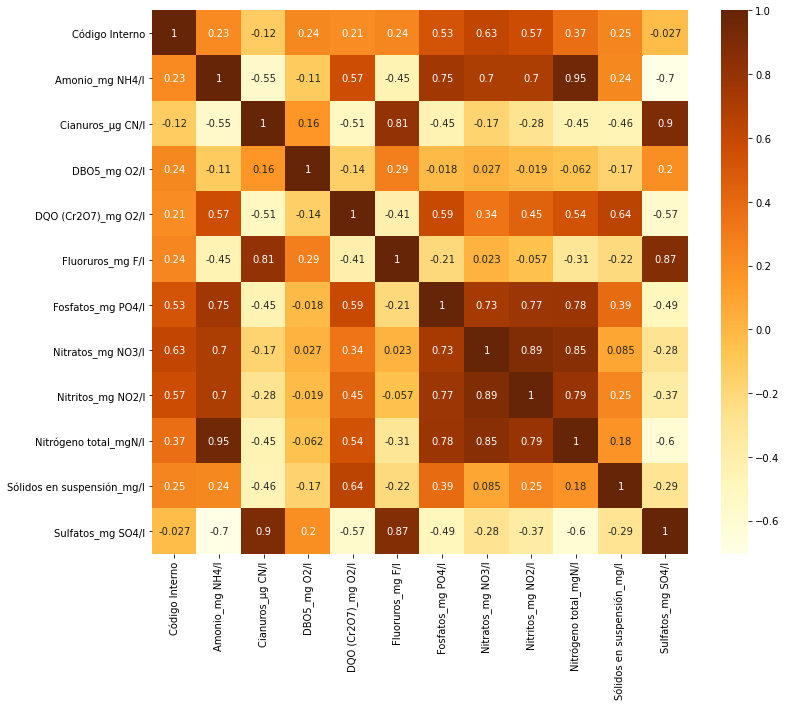

In [15]:
corrmat = data.corr(method = 'spearman')
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corrmat, ax = ax, 
            xticklabels=corrmat.columns,
            yticklabels=corrmat.columns,annot = True, cmap = 'YlOrBr')

**4. TRAIN-TEST**

Vamos a dividir nuestra matriz de datos en los conjuntos train-test. Nuestro objetivo es predecir la concentración de sulfatos.

In [31]:
X = data[columns]

In [33]:
X_data = X.drop('Sulfatos_mg SO4/l', axis = 1)

In [34]:
y_data = X['Sulfatos_mg SO4/l']

In [35]:
X_data.head()

,Amonio_mg NH4/l,Cianuros_µg CN/l,DBO5_mg O2/l,DQO (Cr2O7)_mg O2/l,Fluoruros_mg F/l,Fosfatos_mg PO4/l,Nitratos_mg NO3/l,Nitritos_mg NO2/l,Nitrógeno total_mgN/l,Sólidos en suspensión_mg/l
0,0.0,230,0.0,0.0,0.34,0.0,5.2,0.00,0.0,24.0
1,0.0,390,0.0,0.0,0.42,0.0,6.1,0.00,0.0,7.0
2,0.0,190,0.0,0.0,0.30,0.0,8.0,0.00,0.0,18.0
3,0.0,240,0.0,0.0,0.35,0.0,7.0,0.00,0.0,0.0
4,6.8,130,0.0,29.0,0.29,0.6,24.0,1.24,14.0,41.0


In [36]:
y_data.head()

0    510
1    670
2    560
3    550
4    300
Name: Sulfatos_mg SO4/l, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)

In [39]:
print("El conjunto train tiene {} muestras.".format(X_train.shape[0]))
print("El conjunto set tiene {} muestras.".format(X_test.shape[0]))

El conjunto train tiene 22 muestras.
El conjunto set tiene 10 muestras.


**5. MODELOS**

Vamos a entrenar los siguientes modelos: regresión lineal, Ridge y Lasso. Compararemos sus valores de precisión y el error cuadrático medio de cada uno de los modelos generados

__5.1. Regresión lineal__

Comenzaremos con el modelo de regresión lineal.

In [26]:
s = StandardScaler()
lr = LinearRegression()

In [43]:
X_train_s = s.fit_transform(X_train)
lr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = lr.predict(X_test_s)

linear_score = r2_score(y_test.values, y_pred)
linear_score

0.2642643472981029

__5.2. Regresión de Lasso__

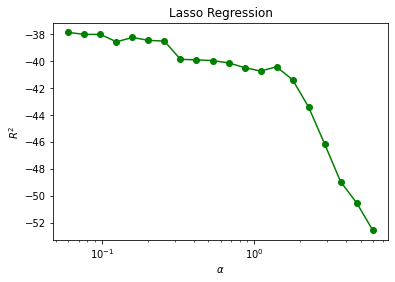

In [60]:
pf = PolynomialFeatures(degree=3)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
scores = []
alphas = np.geomspace(0.06, 6.0, 20)
predictions_lsr = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions_lsr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    
    score = r2_score(y_train, predictions_lsr)
    
    scores.append(score)
plt.semilogx(alphas, scores, '-o', color='green')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [70]:
best_estimator_las = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator_las.fit(X_train, y_train)
lasso_score = best_estimator_las.score(X_train, y_train)
lasso_score

0.9999968774202833

__5.2. Regresión de Ridge__

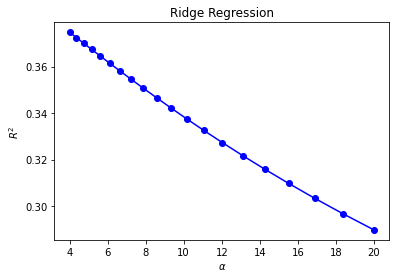

In [61]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
predictions_rr = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions_rr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions_rr)
    scores.append(score)

plt.plot(alphas, scores, '-o', color='blue')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [71]:
best_estimator_rg = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=0.03))])

best_estimator_rg.fit(X_train, y_train)
ridge_score = best_estimator_rg.score(X_train, y_train)
ridge_score

0.9999985521370487

**6. COMPARACIÓN DE LOS MODELOS**

In [75]:
pd.DataFrame([[linear_score, lasso_score, ridge_score]],columns=['Linear', 'Lasso', 'Ridge'], index=['score'])

,Linear,Lasso,Ridge
score,0.264264,0.999997,0.999999


In [63]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))



In [72]:
linearRegression_rmse = rmse(y_test, lr.predict(X_test))
lasso_rmse = rmse(y_test, best_estimator_las.predict(X_test))
ridge_rmse = rmse(y_test, best_estimator_rg.predict(X_test))

In [74]:
rmse_df = pd.DataFrame([[linearRegression_rmse, lasso_rmse, ridge_rmse]],columns=['Linear', 'Lasso', 'Ridge'], index=['rmse'])
rmse_df

,Linear,Lasso,Ridge
rmse,7350.46631,93.467337,85.023569


Los modelos de Lasso y Ridge presentan un mejor ajuste a los datos, sin embargo, el error es alto. Esto es debido a un sobrejuste del modelo, debido probablemente a la serie temporal de los datos. Sería necesaria una serie temporal mayor para que los modelos se ajusten mejor.